In [2]:
!pip install 'vanna[ollama,chromadb]'

In [1]:
from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
# only working with locally installed Ollama
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'codestral'})

In [3]:
#Chinook_Sqlite.sqlite should be on the same directory of the notebook workspace.
vn.connect_to_sqlite('Chinook_Sqlite.sqlite')

In [4]:
# Remove existing training data before training again If there exists training data, we should remove it before training.
existing_training_data = vn.get_training_data()
if len(existing_training_data) > 0:
    for _, training_data in existing_training_data.iterrows():
        vn.remove_training_data(training_data["id"])

# Get the DDL of the SQLite database        
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

# Train the model on the DDL data
# Train the model only once. Don't repeate the step twice.
for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)

Add of existing embedding ID: 5665d55f-7b6d-5d98-8e43-6653428695fa-ddl
Add of existing embedding ID: 291a67cf-a386-5e8a-b858-dee5a9060a31-ddl
Add of existing embedding ID: 898268bb-3aa1-5c1d-ab43-56a338bdef6f-ddl
Add of existing embedding ID: 344578ab-d80f-52d4-976e-78a3e54d3c6d-ddl
Add of existing embedding ID: 7bd3c98d-b531-567d-b9c1-693c7cbbd5e3-ddl
Add of existing embedding ID: 044ba63a-a15d-5339-b4f1-950e93c541be-ddl
Add of existing embedding ID: 5793b49d-25f0-56ac-8557-45389b6ad864-ddl
Add of existing embedding ID: 3858dfec-459a-53b5-afc9-8d854748161f-ddl
Add of existing embedding ID: 9444acf2-6428-5e3c-8ab1-24f92477e88e-ddl
Add of existing embedding ID: 73b20f77-f874-5c2d-bf6f-94a43bdf5664-ddl
Add of existing embedding ID: e6de8429-fd12-5c09-9c76-7725ddda2664-ddl
Add of existing embedding ID: 3337d9c1-6447-541d-b8d3-9a90f3f85fc8-ddl
Add of existing embedding ID: 93c72821-a041-5508-a9fc-ce75311da7fd-ddl
Add of existing embedding ID: b1fd0669-8857-586b-a285-a7b64d74ad60-ddl
Add of

Adding ddl: CREATE TABLE [Album]
(
    [AlbumId] INTEGER  NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),
    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE [Artist]
(
    [ArtistId] INTEGER  NOT NULL,
    [Name] NVARCHAR(120),
    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])
)
Adding ddl: CREATE TABLE [Customer]
(
    [CustomerId] INTEGER  NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    CONSTRAINT [PK_Customer] PRIMARY KEY  ([CustomerId]),
    FOREIGN KEY ([SupportRepId]) REFERENCES [Employee] ([Emp

In [5]:
# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
#vn.train(ddl="""
#    CREATE TABLE [Invoice_archive]
#(
#    [InvoiceId] INTEGER  NOT NULL,
#    [CustomerId] INTEGER  NOT NULL,
#    [InvoiceDate] DATETIME  NOT NULL,
#    [BillingAddress] NVARCHAR(70),
#    [BillingCity] NVARCHAR(40),
#    [BillingState] NVARCHAR(40),
#    [BillingCountry] NVARCHAR(40),
#    [BillingPostalCode] NVARCHAR(10),
#    [Total] NUMERIC(10,2)  NOT NULL,
#    CONSTRAINT [PK_Invoice] PRIMARY KEY  ([InvoiceId]),
#    FOREIGN KEY ([CustomerId]) REFERENCES [Customer] ([CustomerId]) 
#		ON DELETE NO ACTION ON UPDATE NO ACTION
#);
#""")

# Sometimes you may want to add documentation about your business terminology or definitions.
#vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
# list the tracks that are at least 250 seconds long
# vn.train(sql="SELECT Milliseconds 1000.0 AS Seconds, * FROM Track WHERE	Seconds >= 250;")

In [6]:
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,044ba63a-a15d-5339-b4f1-950e93c541be-ddl,None,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...,ddl
1,291a67cf-a386-5e8a-b858-dee5a9060a31-ddl,None,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...,ddl
2,3337d9c1-6447-541d-b8d3-9a90f3f85fc8-ddl,None,CREATE INDEX [IFK_AlbumArtistId] ON [Album] ([...,ddl
3,344578ab-d80f-52d4-976e-78a3e54d3c6d-ddl,None,CREATE TABLE [Employee]\n(\n [EmployeeId] I...,ddl
4,3858dfec-459a-53b5-afc9-8d854748161f-ddl,None,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...,ddl
5,52c8d5a3-d118-50af-bb23-2cd719fc02d2-ddl,None,CREATE INDEX [IFK_TrackMediaTypeId] ON [Track]...,ddl
6,5665d55f-7b6d-5d98-8e43-6653428695fa-ddl,None,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...,ddl
7,5793b49d-25f0-56ac-8557-45389b6ad864-ddl,None,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...,ddl
8,58b2d5f7-d7a5-5c6c-8708-7eb383fabb4c-ddl,None,CREATE INDEX [IFK_PlaylistTrackTrackId] ON [Pl...,ddl
9,73b20f77-f874-5c2d-bf6f-94a43bdf5664-ddl,None,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...,ddl


Number of requested results 10 is greater than number of elements in index 0, updating n_results = 0


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Invoice]\n(\n    [InvoiceId] INTEGER  NOT NULL,\n    [CustomerId] INTEGER  NOT NULL,\n    [InvoiceDate] DATETIME  NOT NULL,\n    [BillingAddress] NVARCHAR(70),\n    [BillingCity] NVARCHAR(40),\n    [BillingState] NVARCHAR(40),\n    [BillingCountry] NVARCHAR(40),\n    [BillingPostalCode] NVARCHAR(10),\n    [Total] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Invoice] PRIMARY KEY  ([InvoiceId]),\n    FOREIGN KEY ([CustomerId]) REFERENCES [Customer] ([CustomerId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [InvoiceLine]\n(\n    [InvoiceLineId] INTEGER  NOT NULL,\n    [InvoiceId] INTEGER  NOT NULL,\n    [TrackId] INTEGER  NOT NULL,\n    [UnitPrice] NUMERIC(10,2)  NOT NULL,\n    [Quantity] INTEGER  NO

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


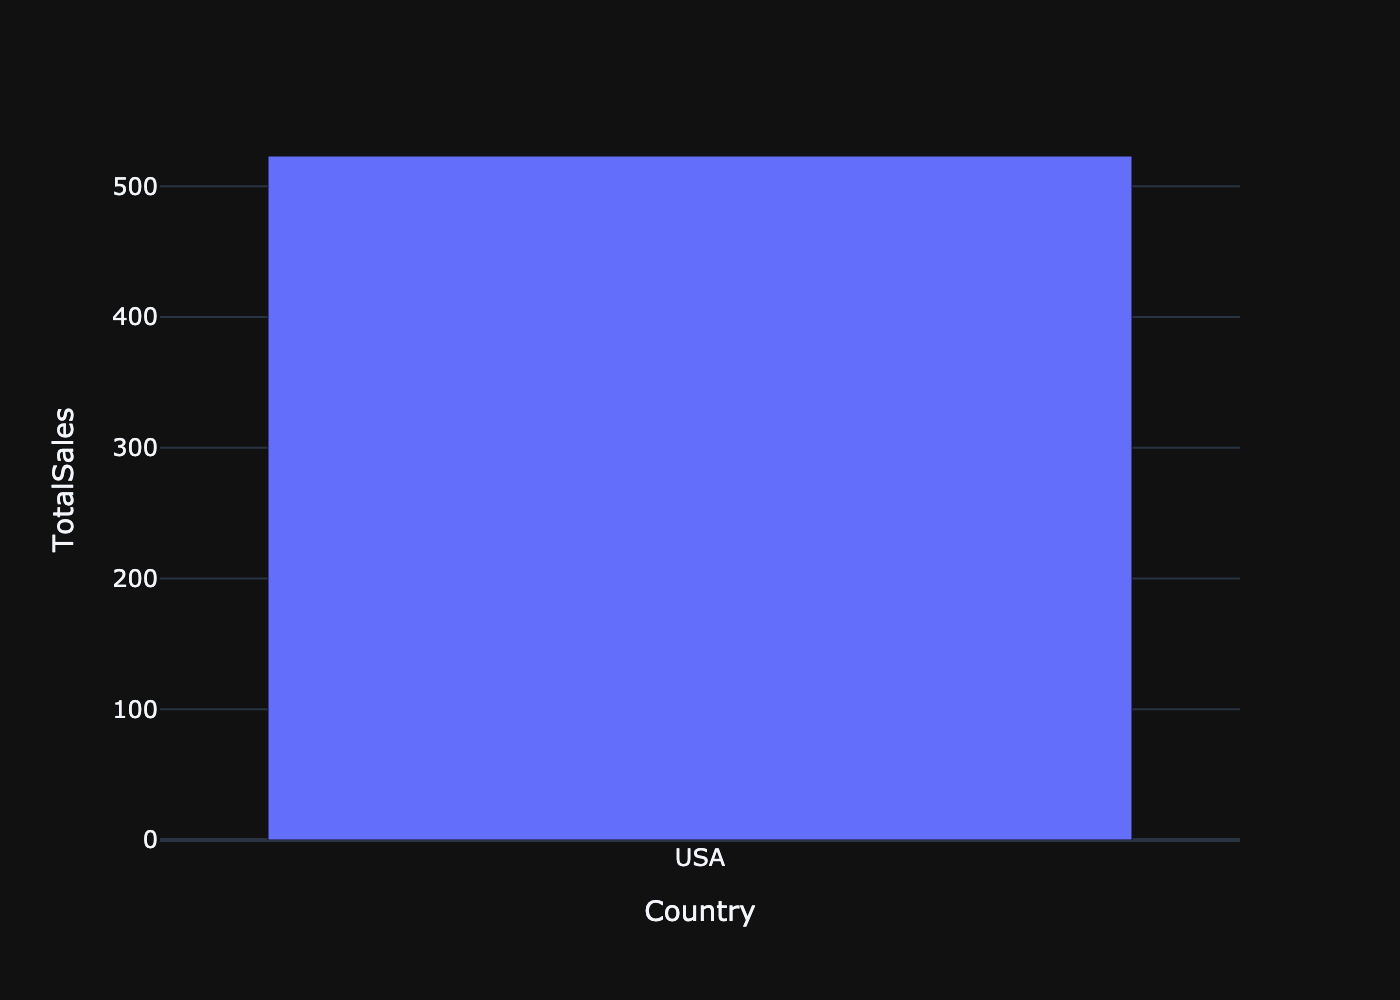

('SELECT Country, SUM(Total) as TotalSales\nFROM Invoice JOIN Customer ON Invoice.CustomerId = Customer.CustomerId\nGROUP BY Country\nORDER BY TotalSales DESC\nLIMIT 1',
   Country  TotalSales
 0     USA      523.06,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Country=%{x}<br>TotalSales=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['USA'], dtype=object),
               'xaxis': 'x',
               'y': array([523.06]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 

In [9]:
vn.ask(question="shows the total sales per country. Which country's customers spent the most?", allow_llm_to_see_data=True)
#What is the data for all rows where the time (in seconds) is equal to or greater than 250? 
#sql = vn.generate_sql("What is the data for track events that occurred more than 250 seconds (4 minutes and 10 seconds) after an event started?")
#sql = vn.generate_sql("shows the total sales per country. Which country's customers spent the most?")
#vn.run_sql(sql)


In [ ]:
# UI url: localhost:8084
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn, allow_llm_to_see_data=True)
app.run()